# Sentiment prediction

## Getting the data ready

In [1]:
#Bring out everything stored

%run Libraries.ipynb
%store -r 

#Create a copy of the original dataframe in order to change its polarity column values with new ones and compare them

df2 = df.copy()

df2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thanasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thanasis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


id_str  \
314879  1425496491330842624   
314880  1425496492685598725   
314881  1425496493667098625   
314882  1425496493830643716   
314883  1425496494065528835   
...                     ...   
364874  1425862484397854725   
364875  1425862486830501888   
364876  1425862488277520384   
364877  1425862488285921289   
364878  1425862489405902851   

                                                     text  \
314879  @Shawn_on_Games @nypost Do you not realize the...   
314880  Get ready!!! FAUCI warns  FULL  VACCINE MANDAT...   
314881  it's one thing to get the vaccine voluntarily,...   
314882  @ScruffyVandal @Justasnowmexic1 @JiQed @Newswe...   
314883  I can't believe we continue to fall into media...   
...                                                   ...   
364874  If you decide to get vaccinated against COVID ...   
364875  @DavidRF34 @archerbandrodie @realTuckFrumper H...   
364876  Of course the media is silent. WellIn their de...   
364877  @kayleighmcenany Florida radio host hospitaliz...   
364878  We are getting closer to actual science.  We k...   

                 created_at  polarity     user_location  
314879  2021-08-11 16:37:02         0   Orange Park, FL  
314880  2021-08-11 16:37:02         0     Michigan, USA  
314881  2021-08-11 16:37:03         0  Toronto, Ontario  
314882  2021-08-11 16:37:03         1               NaN  
314883  2021-08-11 16:37:03         0               NaN  
...                     ...       ...               ...  
364874  2021-08-12 16:51:22         0          Lutz, FL  
364875  2021-08-12 16:51:22         1   Born in the USA  
364876  2021-08-12 16:51:23         0               NaN  
364877  2021-08-12 16:51:23         0               NaN  
364878  2021-08-12 16:51:23         0              KDIX  

[50000 rows x 5 columns]

In [2]:
#Get only the text from our tweets and process it

mytweets_text = df2["text"].tolist()

myprocessed_tweets_text = []

for tweet in mytweets_text:

    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)
 
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    processed_tweet = processed_tweet.lower()
    
    myprocessed_tweets_text.append(processed_tweet)
    
myprocessed_tweets_text

[' shawn_on_games nypost do you not realize there is no covid 19 vaccine there is an experimental drug that contain https co 04tz4gsgzk',
 'get ready fauci warns full vaccine mandates coming pending fda full approval of the vaccines they are be https co ccf0zqqvlu',
 'it one thing to get the vaccine voluntarily it another thing to force people to get it it one thing to requ https co 3mp960pqcm',
 ' scruffyvandal justasnowmexic1 jiqed newsweek the intelligent people whove been paying attention know that this https co bvdyalq3hy',
 'i can believe we continue to fall into medias divisive tactics with this vaccine they used it in trump presid https co qnfzyhanug',
 ' jonjpreston coatsy79 helioschariot govuk gave you the only valid reason the vaccine does not prevent someone https co z4ovwedqak',
 ' the investigation into andrew cuomo revealed pattern of harassment back to school panic as states hold onto https co rtr5dj5yhl',
 ' theroot just typical conservative trumpster vaccine denier sm

In [3]:
#Import four datasets with tweets and their sentiments

airline = pd.read_csv("airline.csv")

coachella = pd.read_csv("coachella.csv")

corona1 = pd.read_csv("corona1.csv")

corona2 = pd.read_csv("corona2.csv")

dilemma = pd.read_csv("dilemma.csv")

airline

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      681448150    False   finalized                   3      2/25/15 5:24   
1      681448153    False   finalized                   3      2/25/15 1:53   
2      681448156    False   finalized                   3     2/25/15 10:01   
3      681448158    False   finalized                   3      2/25/15 3:05   
4      681448159    False   finalized                   3      2/25/15 5:50   
...          ...      ...         ...                 ...               ...   
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sentiment  airline_sentiment:confidence          negativereason  \
0               neutral                        1.0000                     NaN   
1              positive                        0.3486                     NaN   
2               neutral                        0.6837                     NaN   
3              negative                        1.0000              Bad Flight   
4              negative                        1.0000              Can't Tell   
...                 ...                           ...                     ...   
14635          positive                        0.3487                     NaN   
14636          negative                        1.0000  Customer Service Issue   
14637           neutral                        1.0000                     NaN   
14638          negative                        1.0000  Customer Service Issue   
14639           neutral                        0.6771                     NaN   

       negativereason:confidence         airline airline_sentiment_gold  \
0                            NaN  Virgin America                    NaN   
1                         0.0000  Virgin America                    NaN   
2                            NaN  Virgin America                    NaN   
3                         0.7033  Virgin America                    NaN   
4                         1.0000  Virgin America                    NaN   
...                          ...             ...                    ...   
14635                     0.0000        American                    NaN   
14636                     1.0000        American                    NaN   
14637                        NaN        American                    NaN   
14638                     0.6659        American                    NaN   
14639                     0.0000        American                    NaN   

                  name negativereason_gold  retweet_count  \
0              cairdin                 NaN              0   
1             jnardino                 NaN              0   
2           yvonnalynn                 NaN              0   
3             jnardino                 NaN              0   
4             jnardino                 NaN              0   
...                ...                 ...            ...   
14635  KristenReenders                 NaN              0   
14636         itsropes                 NaN              0   
14637         sanyabun                 NaN              0   
14638       SraJackson                 NaN              0   
14639        daviddtwu                 NaN              0   

                                                    text tweet_coord  \
0                    @VirginAmerica What @dhepburn said.         NaN   
1      @VirginAmerica plus you've added commercials t...         NaN   
2      @VirginAmerica I didn't today... Must mean I n...         NaN   
3      @VirginAmerica it's really aggressive to blast...         NaN   
4      @VirginAmerica and it's a really big bad thing...         NaN   
...                 

In [4]:
#Process the data from the datasets

def emotions(x):
    
    if (x == 'Negative' or x == 'Extremely Negative'): return "negative"
    if (x == 'Positive' or x == 'Extremely Positive'):   return "positive"
    if x == 'Neutral':   return "neutral"
    
corona1['Sentiment'] = corona1['Sentiment'].apply(emotions)

corona2['Sentiment'] = corona2['Sentiment'].apply(emotions)

dilemma['Sentiment'] = dilemma['Sentiment'].apply(emotions)

i = 0

for r in airline['retweet_count']:
    
    if(r != 0):

        airline = airline.drop(airline.index[i])
        
        i -= 1
        
    i += 1
    
i = 0

for r in coachella['retweet_count']:
    
    if(r != 0):

        coachella = coachella.drop(coachella.index[i])
        
        i -= 1
        
    i += 1
    
i = 0

for s in coachella['coachella_sentiment']:
    
    if(s == "cant tell"):

        coachella = coachella.drop(coachella.index[i])
        
        i -= 1
        
    i += 1

In [5]:
#Get only the text and the sentiment of the downloaded tweets from all datasets and put them in the same array

airline_text = airline["text"].values  
airline_polarity = airline["airline_sentiment"].values

coachella_text = coachella["text"].values  
coachella_polarity = coachella["coachella_sentiment"].values

corona1_text = corona1["OriginalTweet"].values  
corona1_polarity = corona1["Sentiment"].values

corona2_text = corona2["OriginalTweet"].values  
corona2_polarity = corona2["Sentiment"].values

dilemma_text = dilemma["text"].values  
dilemma_polarity = dilemma["Sentiment"].values

tweets_text = np.append(airline_text, coachella_text)
tweets_text = np.append(tweets_text, corona1_text)
tweets_text = np.append(tweets_text, corona2_text)
tweets_text = np.append(tweets_text, dilemma_text)

tweets_polarity =  np.append(airline_polarity, coachella_polarity)
tweets_polarity =  np.append(tweets_polarity, corona1_polarity)
tweets_polarity =  np.append(tweets_polarity, corona2_polarity)
tweets_polarity =  np.append(tweets_polarity, dilemma_polarity)

In [6]:
#Create a pie chart to show the percentage of each emotion

df_pie_prediction = pd.DataFrame({'Polarity':tweets_polarity})

df_pie_prediction = df_pie_prediction.groupby('Polarity').size()

mylabels = ["Negative", "Neutral", "Positive"]
mycolors = ["darkred","mediumblue", "darkgreen"]
myvalues_prediction = [df_pie_prediction['negative'], df_pie_prediction['neutral'], df_pie_prediction['positive']]

fig = go.Figure(data = [go.Pie(labels = mylabels, values = myvalues_prediction)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, 
                  marker = dict(colors = mycolors, line = dict(color = '#000000', width = 2)),
                  title = "Polarity Pie - Datasets")

fig.show()

### Balancing the 3 sentiments

In [7]:
i = 0
stop = 0

for s in airline['airline_sentiment']:
    
    if(s == "negative"):

        airline = airline.drop(airline.index[i])
        
        stop = stop + 1
        
        i -= 1
        
    i += 1
    
    if(stop == 5000):
        
        break
        
i = 0
stop = 0

for s in corona1['Sentiment']:
    
    if(s == "negative"):

        corona1 = corona1.drop(corona1.index[i])
        
        stop = stop + 1
        
        i -= 1
        
    i += 1
    
    if(stop == 5000):
        
        break
        
i = 0
stop = 0

for s in corona1['Sentiment']:
    
    if(s == "positive"):

        corona1 = corona1.drop(corona1.index[i])
        
        stop = stop + 1
        
        i -= 1
        
    i += 1
    
    if(stop == 8000):
        
        break
        
i = 0
stop = 0
        
for s in dilemma['Sentiment']:
    
    if(s == "positive"):

        dilemma = dilemma.drop(dilemma.index[i])
        
        stop = stop + 1
        
        i -= 1
        
    i += 1
    
    if(stop == 5000):
        
        break

In [8]:
#Get only the text and the sentiment of the downloaded tweets from all datasets and put them in the same array

airline_text = airline["text"].values  
airline_polarity = airline["airline_sentiment"].values

coachella_text = coachella["text"].values  
coachella_polarity = coachella["coachella_sentiment"].values

corona1_text = corona1["OriginalTweet"].values  
corona1_polarity = corona1["Sentiment"].values

corona2_text = corona2["OriginalTweet"].values  
corona2_polarity = corona2["Sentiment"].values

dilemma_text = dilemma["text"].values  
dilemma_polarity = dilemma["Sentiment"].values

tweets_text = np.append(airline_text, coachella_text)
tweets_text = np.append(tweets_text, corona1_text)
tweets_text = np.append(tweets_text, corona2_text)
tweets_text = np.append(tweets_text, dilemma_text)

tweets_polarity =  np.append(airline_polarity, coachella_polarity)
tweets_polarity =  np.append(tweets_polarity, corona1_polarity)
tweets_polarity =  np.append(tweets_polarity, corona2_polarity)
tweets_polarity =  np.append(tweets_polarity, dilemma_polarity)

In [9]:
#Create a pie chart to show the percentage of each emotion

df_pie_prediction = pd.DataFrame({'Polarity':tweets_polarity})

df_pie_prediction = df_pie_prediction.groupby('Polarity').size()

mylabels = ["Negative", "Neutral", "Positive"]
mycolors = ["darkred","mediumblue", "darkgreen"]
myvalues_prediction = [df_pie_prediction['negative'], df_pie_prediction['neutral'], df_pie_prediction['positive']]

fig = go.Figure(data = [go.Pie(labels = mylabels, values = myvalues_prediction)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, 
                  marker = dict(colors = mycolors, line = dict(color = '#000000', width = 2)),
                  title = "Polarity Pie - Datasets")

fig.show()

In [15]:
#Process the text of the downloaded tweets 

processed_tweets_text = []
 
for tweet in tweets_text:  

    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)  

    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    processed_tweet = processed_tweet.lower()
 
    processed_tweets_text.append(processed_tweet)
    
processed_tweets_text

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn _but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica this is such great deal already thinking about my 2nd trip to australia amp haven even gone on my 1st trip yet p',
 ' virginamerica virginmedia m flying your fabulous seductive skies again take all the stress away from travel http co ahlxhhkiyn',
 ' virginamerica thanks ',
 ' virginamerica so excited for my first 

## We use TF-IDF for text to numeric conversion

In [12]:
#Transform our and the downloaded processed tweets text

vectorizer = TfidfVectorizer(max_features = 2000, min_df = 10, max_df = 0.8, stop_words = stopwords.words('english'))

transformed_processed_tweets_text = vectorizer.fit_transform(processed_tweets_text).toarray()

transformed_myprocessed_tweets_text = vectorizer.fit_transform(myprocessed_tweets_text).toarray()

transformed_processed_tweets_text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#Split the data into the train and the test sets

X_train, X_test, y_train, y_test = train_test_split(transformed_processed_tweets_text, tweets_polarity, test_size = 0.2, random_state = 0)

## Classification prediction models

In [17]:
#Make a list to put all the algorithm accuracies in order to compare them in the end

accuracy = []
algorithms = ['Logistic Regression', 'Naive-Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine Classifier', 'K-Nearest Neighbours Classifier', 'Stochastic Gradient Descent Classifier', 'Gradient Boosting Classifier', 'XGBoost Classifier', 'Passive Aggressive Classifier', 'LSTM Classifier']

### Logistic Regression

In [133]:
#Build the lor model and make the predictions

model_lor = LogisticRegression(solver = "sag").fit(X_train, y_train)

predictions = model_lor.predict(X_test)

df_lor = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_lor

Actual Predicted
0       neutral  negative
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [134]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2917  529  504]
 [ 449 2893  495]
 [ 504  578 2882]]
              precision    recall  f1-score   support

    negative       0.75      0.74      0.75      3950
     neutral       0.72      0.75      0.74      3837
    positive       0.74      0.73      0.73      3964

    accuracy                           0.74     11751
   macro avg       0.74      0.74      0.74     11751
weighted avg       0.74      0.74      0.74     11751

0.7396817292145349


### Naive-Bayes Classifier

In [135]:
#Build the nbc model and make the predictions

model_nbc = MultinomialNB().fit(X_train, y_train)

predictions = model_nbc.predict(X_test)

df_nbc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_nbc

Actual Predicted
0       neutral  negative
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [136]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2877  446  627]
 [ 750 2353  734]
 [ 698  521 2745]]
              precision    recall  f1-score   support

    negative       0.67      0.73      0.70      3950
     neutral       0.71      0.61      0.66      3837
    positive       0.67      0.69      0.68      3964

    accuracy                           0.68     11751
   macro avg       0.68      0.68      0.68     11751
weighted avg       0.68      0.68      0.68     11751

0.6786656454769807


### Decision Tree Classifier

In [137]:
#Build the dtc model and make the predictions

model_dtc = DecisionTreeClassifier(random_state = 0).fit(X_train,y_train)

predictions = model_dtc.predict(X_test)

df_dtc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_dtc

Actual Predicted
0       neutral  positive
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  positive
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [138]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2463  741  746]
 [ 610 2647  580]
 [ 682  683 2599]]
              precision    recall  f1-score   support

    negative       0.66      0.62      0.64      3950
     neutral       0.65      0.69      0.67      3837
    positive       0.66      0.66      0.66      3964

    accuracy                           0.66     11751
   macro avg       0.66      0.66      0.66     11751
weighted avg       0.66      0.66      0.66     11751

0.6560292741043315


### Random Forest Classifier

In [139]:
#Build the rfc model and make the predictions

model_rfc = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)

predictions = model_rfc.predict(X_test)

df_rfc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_rfc

Actual Predicted
0       neutral  positive
1      negative   neutral
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  positive
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [140]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2759  649  542]
 [ 507 2926  404]
 [ 542  608 2814]]
              precision    recall  f1-score   support

    negative       0.72      0.70      0.71      3950
     neutral       0.70      0.76      0.73      3837
    positive       0.75      0.71      0.73      3964

    accuracy                           0.72     11751
   macro avg       0.72      0.72      0.72     11751
weighted avg       0.72      0.72      0.72     11751

0.7232575950982895


### Support Vector Machine Classifier

In [141]:
#Build the svmc model and make the predictions

model_svmc = svm.SVC(kernel = 'linear').fit(X_train, y_train)

predictions = model_svmc.predict(X_test)

df_svmc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_svmc

Actual Predicted
0       neutral  negative
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [142]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2910  555  485]
 [ 427 2943  467]
 [ 492  580 2892]]
              precision    recall  f1-score   support

    negative       0.76      0.74      0.75      3950
     neutral       0.72      0.77      0.74      3837
    positive       0.75      0.73      0.74      3964

    accuracy                           0.74     11751
   macro avg       0.74      0.74      0.74     11751
weighted avg       0.74      0.74      0.74     11751

0.7441919836609651


### K-Nearest Neighbors Classifier

In [143]:
#Build the knnc model and make the predictions

model_knnc = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

predictions = model_knnc.predict(X_test) 

df_knnc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_knnc

Actual Predicted
0       neutral   neutral
1      negative   neutral
2      negative  negative
3      negative  negative
4      positive   neutral
...         ...       ...
11746  negative   neutral
11747  positive   neutral
11748  negative   neutral
11749  positive   neutral
11750   neutral   neutral

[11751 rows x 2 columns]

In [144]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[ 626 3193  131]
 [  84 3592  161]
 [  69 3090  805]]
              precision    recall  f1-score   support

    negative       0.80      0.16      0.26      3950
     neutral       0.36      0.94      0.52      3837
    positive       0.73      0.20      0.32      3964

    accuracy                           0.43     11751
   macro avg       0.63      0.43      0.37     11751
weighted avg       0.64      0.43      0.37     11751

0.4274529827248745


### Stochastic Gradient Descent Classifier

In [145]:
#Build the sgdc model and make the predictions

model_sgdc = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 0).fit(X_train, y_train)

predictions = model_sgdc.predict(X_test) 

df_sgdc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_sgdc

Actual Predicted
0       neutral  negative
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [146]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2873  651  426]
 [ 377 3074  386]
 [ 478  716 2770]]
              precision    recall  f1-score   support

    negative       0.77      0.73      0.75      3950
     neutral       0.69      0.80      0.74      3837
    positive       0.77      0.70      0.73      3964

    accuracy                           0.74     11751
   macro avg       0.75      0.74      0.74     11751
weighted avg       0.75      0.74      0.74     11751

0.741809207727002


### Gradient Boosting Classifier

In [147]:
#Build the gbc model and make the predictions

model_gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0).fit(X_train, y_train)

predictions = model_gbc.predict(X_test) 

df_gbc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_gbc

Actual Predicted
0       neutral  negative
1      negative  positive
2      negative  negative
3      negative  negative
4      positive   neutral
...         ...       ...
11746  negative  positive
11747  positive  positive
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [148]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[1838 1178  934]
 [ 557 2613  667]
 [ 806 1200 1958]]
              precision    recall  f1-score   support

    negative       0.57      0.47      0.51      3950
     neutral       0.52      0.68      0.59      3837
    positive       0.55      0.49      0.52      3964

    accuracy                           0.55     11751
   macro avg       0.55      0.55      0.54     11751
weighted avg       0.55      0.55      0.54     11751

0.5454003914560462


### XGBoost Classifier

In [149]:
#Build the xgbc model and make the predictions

model_xgbc = XGBClassifier().fit(X_train, y_train)

predictions = model_xgbc.predict(X_test) 

df_xgbc = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_xgbc

C:\Users\Thanasis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Actual Predicted
0       neutral  negative
1      negative   neutral
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  positive
11748  negative  positive
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [150]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[2829  679  442]
 [ 440 3023  374]
 [ 443  683 2838]]
              precision    recall  f1-score   support

    negative       0.76      0.72      0.74      3950
     neutral       0.69      0.79      0.74      3837
    positive       0.78      0.72      0.75      3964

    accuracy                           0.74     11751
   macro avg       0.74      0.74      0.74     11751
weighted avg       0.74      0.74      0.74     11751

0.7395115309335376


### Passive Aggressive Classifier

In [15]:
#Build the gbc model and make the predictions

model_pac = PassiveAggressiveClassifier(max_iter = 50).fit(X_train, y_train)

predictions = model_pac.predict(X_test)

df_pac = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df_pac

Actual Predicted
0       neutral  negative
1      negative  negative
2      negative  negative
3      negative  negative
4      positive  positive
...         ...       ...
11746  negative  negative
11747  positive  negative
11748  negative  negative
11749  positive  positive
11750   neutral   neutral

[11751 rows x 2 columns]

In [29]:
#Print metrics

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

accuracy.append(round(accuracy_score(y_test, predictions), 4))

[[3428  336  186]
 [1142 2451  244]
 [1337  540 2087]]
              precision    recall  f1-score   support

    negative       0.58      0.87      0.70      3950
     neutral       0.74      0.64      0.68      3837
    positive       0.83      0.53      0.64      3964

    accuracy                           0.68     11751
   macro avg       0.72      0.68      0.67     11751
weighted avg       0.72      0.68      0.67     11751

0.6778997532124925


### Neural Networks - LSTM Classifier

#### Tokenizer Setup

In [268]:
#Setting up the tokenizer

# The maximum number of words to be used. (most frequent)

MAX_NB_WORDS = 25000

# Max number of words each time

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words = MAX_NB_WORDS, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)
tokenizer.fit_on_texts(processed_tweets_text)
word_index = tokenizer.word_index

In [269]:
#Transforming all the data

X = tokenizer.texts_to_sequences(processed_tweets_text)
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)

myseq = tokenizer.texts_to_sequences(myprocessed_tweets_text)
mypadded = pad_sequences(myseq, maxlen = MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', X.shape)

y = pd.get_dummies(tweets_polarity).values

print('Shape of label tensor:', y.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

Shape of data tensor: (58753, 250)
Shape of label tensor: (58753, 3)


#### LSTM

In [270]:
#Setting up the LSTM model

model_lstm = Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = X.shape[1]))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model_lstm.add(Dense(3, activation = 'softmax'))

model_lstm.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 250, 100)          2500000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 250, 100)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 303       
Total params: 2,580,703
Trainable params: 2,580,703
Non-trainable params: 0
_________________________________________________________________


In [271]:
#Training the model

myepochs = 5
mybatch_size = 64

history = model_lstm.fit(X_train2, y_train2, epochs = myepochs, batch_size = mybatch_size, validation_split = 0.1,
                         callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, min_delta = 0.0001)])

Epoch 1/5
661/661 [==============================] - 1635s 2s/step - loss: 0.7516 - accuracy: 0.6690 - val_loss: 0.5822 - val_accuracy: 0.7735
Epoch 2/5
661/661 [==============================] - 1657s 3s/step - loss: 0.4781 - accuracy: 0.8187 - val_loss: 0.5543 - val_accuracy: 0.7830
Epoch 3/5
661/661 [==============================] - 1805s 3s/step - loss: 0.3743 - accuracy: 0.8627 - val_loss: 0.5614 - val_accuracy: 0.7854
Epoch 4/5
661/661 [==============================] - 1965s 3s/step - loss: 0.2995 - accuracy: 0.8890 - val_loss: 0.6152 - val_accuracy: 0.7777
Epoch 5/5
661/661 [==============================] - 1757s 3s/step - loss: 0.2433 - accuracy: 0.9118 - val_loss: 0.7258 - val_accuracy: 0.7805


In [277]:
#Print metrics

accr = model_lstm.evaluate(X_test2, y_test2)

print('Test set:\n  Loss: {:0.4f}\n  Accuracy: {:0.4f}'.format(accr[0], accr[1]))

accuracy.append(round(accr[1], 4))

368/368 [==============================] - 47s 127ms/step - loss: 0.7615 - accuracy: 0.7711
Test set:
  Loss: 0.7615
  Accuracy: 0.7711


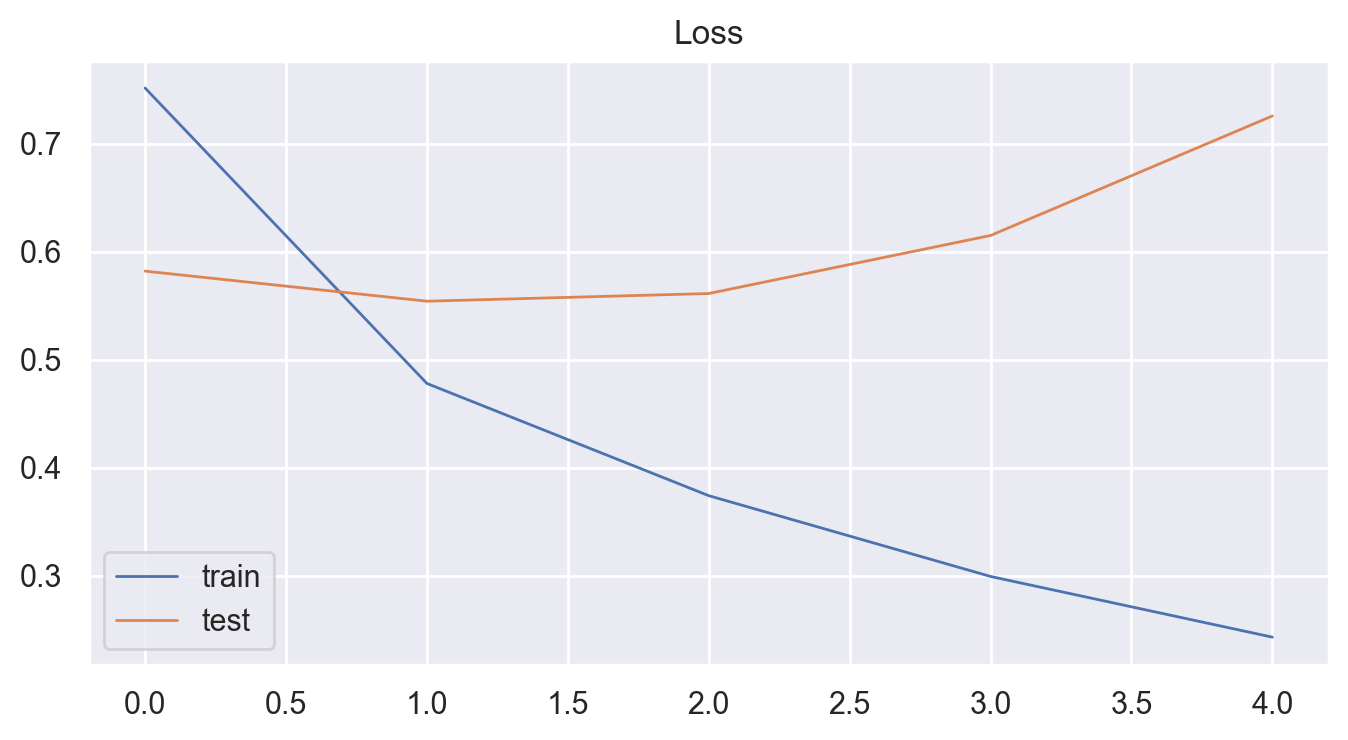

In [278]:
#Plot the Loss

mpl.rcParams['figure.dpi'] = 200
plt.figure(figsize = (16, 6))
sns.set(style = "darkgrid")

plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

plt.show();

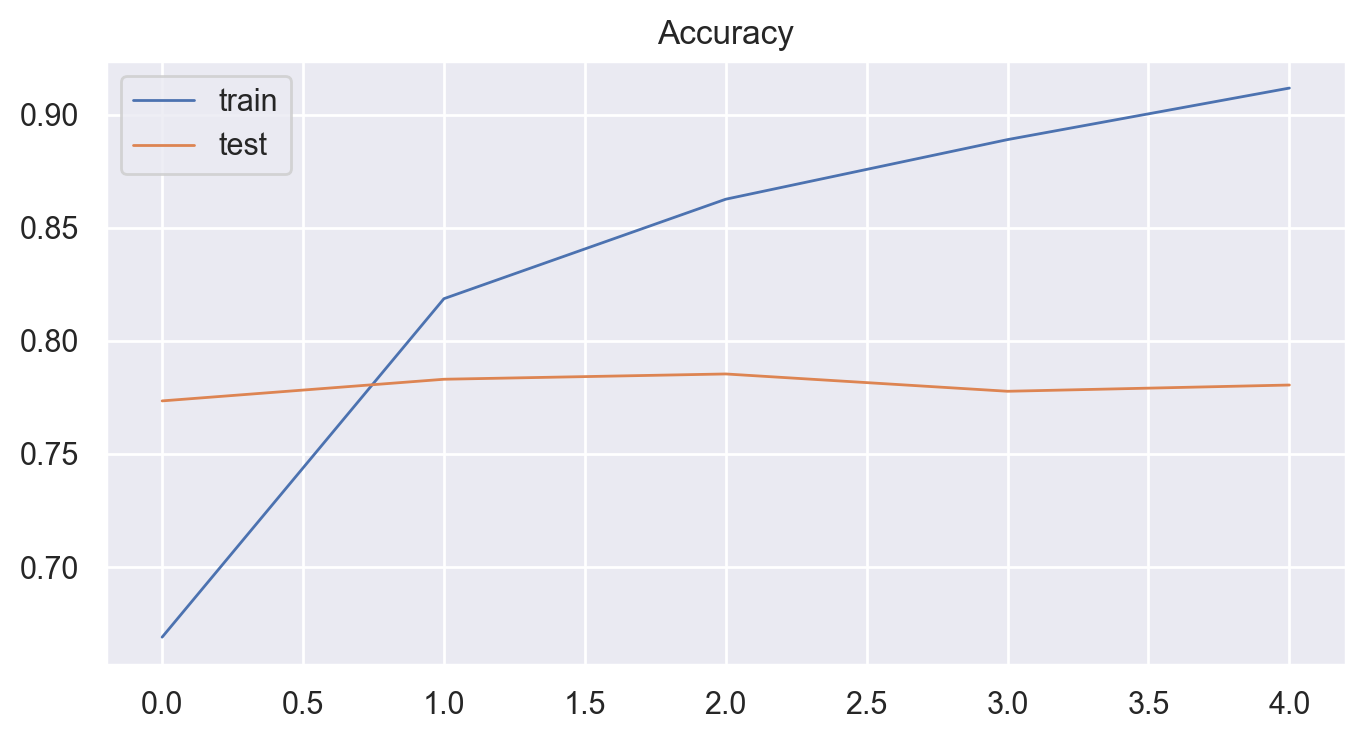

In [279]:
#Plot the accuracy

mpl.rcParams['figure.dpi'] = 200
plt.figure(figsize = (16, 6))
sns.set(style = "darkgrid")

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()

plt.show();

## Results

In [32]:
df_accuracy = pd.DataFrame({'Algorithm': algorithms, 'Accuracy': np.array(accuracy) * 100})

df_accuracy

Algorithm  Accuracy
0                      Logistic Regression     73.97
1                   Naive-Bayes Classifier     67.87
2                 Decision Tree Classifier     65.60
3                 Random Forest Classifier     72.33
4        Support Vector Machine Classifier     74.42
5          K-Nearest Neighbours Classifier     42.75
6   Stochastic Gradient Descent Classifier     74.18
7             Gradient Boosting Classifier     54.54
8                       XGBoost Classifier     73.95
9            Passive Aggressive Classifier     67.79
10                         LSTM Classifier     77.11

In [33]:
#Plot the accuracy of each algorithm

fig = px.bar(df_accuracy, x = "Algorithm", y = "Accuracy", title = "Algorithm Accuracy")
fig.update_traces(marker_color = 'rgb(0,139,139)', marker_line_color = 'rgb(0,0,0)', marker_line_width = 2)

fig.show()

## Best algorithm selection

In [282]:
while(1):

    print("Here are all the algorithms: Logistic Regression, Naive-Bayes Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine Classifier, K-Nearest Neighbours Classifier, Stochastic Gradient Descent Classifier, Gradient Boosting Classifier, XGBoost Classifier, Passive Aggressive Classifier, LSTM Classifier\n")
    
    time.sleep(1)
    
    answer_algorithm = input("Please select the algorithm you want to use to predict the polarity of our tweets. Your answer: ")
    
    if(answer_algorithm != "Logistic Regression" and answer_algorithm != "Naive-Bayes Classifier" 
       and answer_algorithm != "Decision Tree Classifier" and answer_algorithm != "Random Forest Classifier" 
       and answer_algorithm != "Support Vector Machine Classifier" and answer_algorithm != "K-Nearest Neighbours Classifier" 
       and answer_algorithm != "Stochastic Gradient Descent Classifier" and answer_algorithm != "Gradient Boosting Classifier" 
       and answer_algorithm != "XGBoost Classifier" and answer_algorithm != "Passive Aggressive Classifier"
       and answer_algorithm != "LSTM Classifier"):
        
        print("\nThere was an error with your algorithm selection. Please try again.\n")
    
    else:
        
        break
    
if(answer_algorithm == "Logistic Regression"):
    
    model_to_use = model_lor
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "Naive-Bayes Classifier"):
    
    model_to_use = model_nbc
    text = transformed_myprocessed_tweets_text

elif(answer_algorithm == "Decision Tree Classifier"):
    
    model_to_use = model_dtc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "Random Forest Classifier"):
    
    model_to_use = model_rfc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "Support Vector Machine Classifier"):
    
    model_to_use = model_svmc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "K-Nearest Neighbours Classifier"):
    
    model_to_use = model_knnc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "Stochastic Gradient Descent Classifier"):
    
    model_to_use = model_sgdc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "Gradient Boosting Classifier"):
    
    model_to_use = model_gbc
    text = transformed_myprocessed_tweets_text
    
elif(answer_algorithm == "XGBoost Classifier"):
    
    model_to_use = model_xgbc
    text = transformed_myprocessed_tweets_text

elif(answer_algorithm == "Passive Aggressive Classifier"):
    
    model_to_use = model_pac
    text = transformed_myprocessed_tweets_text
    
else:
    
    model_to_use = model_lstm
    text = mypadded

Here are all the algorithms: Logistic Regression, Naive-Bayes, Decision Tree, Random Forest, SVM, K-NN, Stochastic Gradient Descent, Gradient Boosting, XGBoost, LSTM

Please select the algorithm you want to use to predict the polarity of our tweets. Your answer: LSTM


In [283]:
#We predict the polarity of our own tweets

predictions = model_to_use.predict(text)

if(model_to_use == model_lstm):
    
    mypredictions = []

    for i in range(0, len(predictions)):
        
        if(predictions[i][0] == np.max(predictions[i])):
            
            mypredictions.append(-1)
            
        elif(predictions[i][1] == np.max(predictions[i])):
            
            mypredictions.append(0)  
            
        else:
            
            mypredictions.append(1) 
        
    mypredictions = pd.DataFrame(mypredictions, columns = ['polarity'])
    
else:
    
    mypredictions = pd.DataFrame(predictions, columns = ['polarity'])
    
    def categorical_to_numeric(x):
    
        if x == 'negative': return -1
        if x == 'positive':   return 1
        if x == 'neutral':   return 0

    mypredictions['polarity'] = mypredictions['polarity'].apply(categorical_to_numeric)
    

mypredictions

polarity
0            -1
1             1
2             0
3             1
4             0
...         ...
49995         0
49996         0
49997         0
49998         0
49999        -1

[50000 rows x 1 columns]

In [285]:
#Pass the new polarity values to a copy of the original dataframe

df2['polarity'] = mypredictions['polarity'].values

%store df2
print("\n")

df2

Stored 'df2' (DataFrame)




id_str  \
314879  1425496491330842624   
314880  1425496492685598725   
314881  1425496493667098625   
314882  1425496493830643716   
314883  1425496494065528835   
...                     ...   
364874  1425862484397854725   
364875  1425862486830501888   
364876  1425862488277520384   
364877  1425862488285921289   
364878  1425862489405902851   

                                                     text          created_at  \
314879  @Shawn_on_Games @nypost Do you not realize the... 2021-08-11 16:37:02   
314880  Get ready!!! FAUCI warns  FULL  VACCINE MANDAT... 2021-08-11 16:37:02   
314881  it's one thing to get the vaccine voluntarily,... 2021-08-11 16:37:03   
314882  @ScruffyVandal @Justasnowmexic1 @JiQed @Newswe... 2021-08-11 16:37:03   
314883  I can't believe we continue to fall into media... 2021-08-11 16:37:03   
...                                                   ...                 ...   
364874  If you decide to get vaccinated against COVID ... 2021-08-12 16:51:22   
364875  @DavidRF34 @archerbandrodie @realTuckFrumper H... 2021-08-12 16:51:22   
364876  Of course the media is silent. WellIn their de... 2021-08-12 16:51:23   
364877  @kayleighmcenany Florida radio host hospitaliz... 2021-08-12 16:51:23   
364878  We are getting closer to actual science.  We k... 2021-08-12 16:51:23   

        polarity     user_location  
314879        -1   Orange Park, FL  
314880         1     Michigan, USA  
314881         0  Toronto, Ontario  
314882         1                    
314883         0                    
...          ...               ...  
364874         0          Lutz, FL  
364875         0   Born in the USA  
364876         0                    
364877         0                    
364878        -1              KDIX  

[50000 rows x 5 columns]

## Transforming the data to enable time series

In [286]:
#Clean and transform data to enable time series

df2['created_at'] = pd.to_datetime(df2['created_at'])

time_series_df2 = df2.groupby([pd.Grouper(key = 'created_at', freq = '2 s'), 'polarity']).count().unstack(fill_value = 0).stack().reset_index()

time_series_df2['created_at'] = pd.to_datetime(time_series_df2['created_at']).apply(lambda x: x.strftime('%H:%M'))

time_series_df2 = time_series_df2.rename(columns = {"id_str": "Number of Covid-19 vaccine mentions", "created_at":"Time in UTC"})

time_series2 = time_series_df2["Time in UTC"][time_series_df2['polarity'] == 0].reset_index(drop = True)

%store time_series2
print("\n")
%store time_series_df2
print("\n")

time_series_df2

Stored 'time_series2' (Series)


Stored 'time_series_df2' (DataFrame)




Time in UTC  polarity  Number of Covid-19 vaccine mentions  text  \
0           16:37        -1                                    2     2   
1           16:37         0                                    3     3   
2           16:37         1                                    2     2   
3           16:37        -1                                    8     8   
4           16:37         0                                    4     4   
...           ...       ...                                  ...   ...   
19678       16:51         0                                    2     2   
19679       16:51         1                                    5     5   
19680       16:51        -1                                    2     2   
19681       16:51         0                                    4     4   
19682       16:51         1                                    1     1   

       user_location  
0                  2  
1                  3  
2                  2  
3                  8  
4                  4  
...              ...  
19678              2  
19679              5  
19680              2  
19681              4  
19682              1  

[19683 rows x 5 columns]

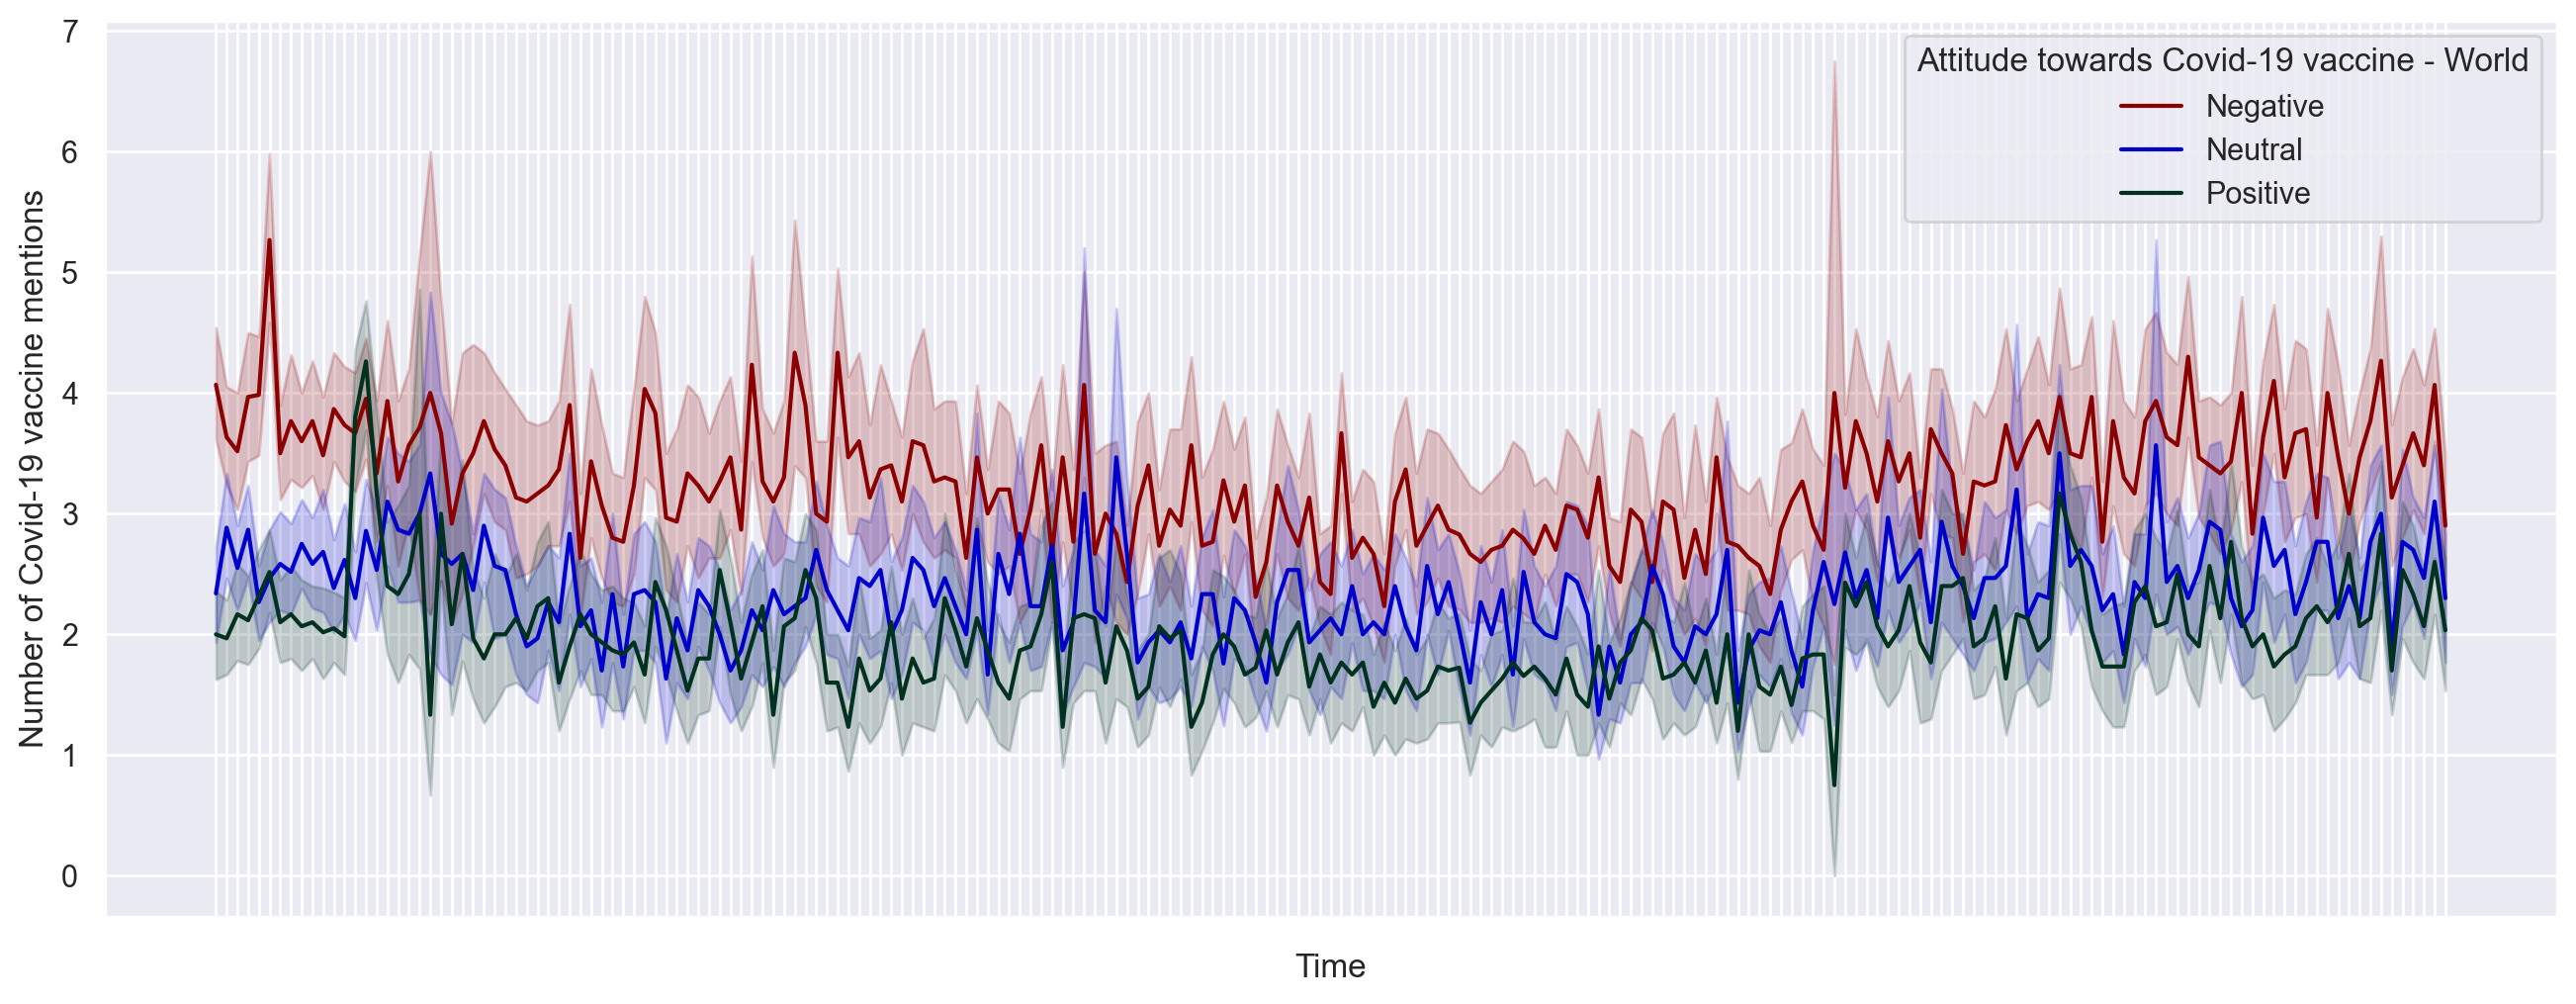

In [293]:
#Plot line chart 

mpl.rcParams['figure.dpi'] = 200
plt.figure(figsize = (16, 6))
sns.set(style = "darkgrid")

ax = sns.lineplot(x = "Time in UTC" ,y = "Number of Covid-19 vaccine mentions", hue = 'polarity', data = time_series_df2, 
                  palette = sns.color_palette(["#8b0000","#0000cd", "#013220"]))
ax.set(xlabel = 'Time', ylabel = "Number of Covid-19 vaccine mentions")
plt.legend(title = 'Attitude towards Covid-19 vaccine - World', loc = 'upper right', labels = ['Negative', 'Neutral', 'Positive'])
sns.set(rc = {"lines.linewidth": 1})
ax.set(xticklabels = [])

plt.show()

In [290]:
#Create a pie chart to show the percentage of each emotion

df_pie2 = df2.groupby('polarity').size()

mylabels = ["Negative", "Neutral", "Positive"]
mycolors = ["darkred","mediumblue", "darkgreen"]
myvalues2 = [df_pie2[-1], df_pie2[0], df_pie2[1]]

%store myvalues2

fig = go.Figure(data = [go.Pie(labels = mylabels, values = myvalues2)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, 
                  marker = dict(colors = mycolors, line = dict(color = '#000000', width = 2)),
                  title = "Polarity Pie - World2")

fig.show()

Stored 'myvalues2' (list)


## Collecting the data only from the USA

In [294]:
#Remove all tweets not made in the USA

df2 = df2.fillna(" ")
df_usa2 = df2

i = 0

for l in df_usa2['user_location']:

    flag = 0
    
    for s in states:
        
        if s in l:
            
            flag = 1
    
    if flag == 0:

        df_usa2 = df_usa2.drop(df_usa2.index[i])
        
        i -= 1
        
    i += 1
    
df_usa2

id_str  \
314879  1425496491330842624   
314880  1425496492685598725   
314885  1425496496825266182   
314888  1425496498964361216   
314893  1425496502152040449   
...                     ...   
364857  1425862473022939147   
364861  1425862474386087944   
364863  1425862476491546632   
364870  1425862482971799566   
364874  1425862484397854725   

                                                     text          created_at  \
314879  @Shawn_on_Games @nypost Do you not realize the... 2021-08-11 16:37:02   
314880  Get ready!!! FAUCI warns  FULL  VACCINE MANDAT... 2021-08-11 16:37:02   
314885  : The investigation into Andrew Cuomo revealed... 2021-08-11 16:37:03   
314888  @imillhiser @mcelhearn Yes. The government has... 2021-08-11 16:37:04   
314893                                    MOTB\nEndTimes  2021-08-11 16:37:05   
...                                                   ...                 ...   
364857  @asbell_tony @cachenca No, you said he flip fl... 2021-08-12 16:51:19   
364861  But mask wearing, hand washing, and physical d... 2021-08-12 16:51:19   
364863  If we could hurry up and make vaccines availab... 2021-08-12 16:51:20   
364870  I actually wouldnt have been able to be around... 2021-08-12 16:51:21   
364874  If you decide to get vaccinated against COVID ... 2021-08-12 16:51:22   

        polarity    user_location  
314879        -1  Orange Park, FL  
314880         1    Michigan, USA  
314885        -1              NYC  
314888         0   El Cerrito, CA  
314893        -1   New Mexico USA  
...          ...              ...  
364857        -1       Edmond, OK  
364861        -1            EARTH  
364863         0   Washington, DC  
364870         1   Washington, DC  
364874         0         Lutz, FL  

[14227 rows x 5 columns]

In [295]:
#Calculate the percentage of US made tweets

percent_usa2 =  len(df_usa2.index) * 100 / len(df2.index)

print("\nThe total tweets created at USA are {}% of the overall tweet collection. Specifically they are {} out of {}.".format(round(percent_usa2, 2), len(df_usa2.index), len(df2.index)))


The total tweets created at USA are 28.45% of the overall tweet collection. Specifically they are 14227 out of 50000.


In [296]:
#Clean and transform data to enable time series

time_series_df_usa2 = df_usa2.groupby([pd.Grouper(key = 'created_at', freq = '2 s'), 'polarity']).count().unstack(fill_value = 0).stack().reset_index()

time_series_df_usa2['created_at'] = pd.to_datetime(time_series_df_usa2['created_at']).apply(lambda x: x.strftime('%H:%M'))

time_series_df_usa2 = time_series_df_usa2.rename(columns = {"id_str": "Number of Covid-19 vaccine mentions", "created_at":"Time in UTC"})

time_series_usa2 = time_series_df_usa2["Time in UTC"][time_series_df_usa2['polarity'] == 0].reset_index(drop=True)

%store time_series_usa2
print("\n")
%store time_series_df_usa2
print("\n")

time_series_df_usa2

Stored 'time_series_usa2' (Series)


Stored 'time_series_df_usa2' (DataFrame)




Time in UTC  polarity  Number of Covid-19 vaccine mentions  text  \
0           16:37        -1                                    2     2   
1           16:37         0                                    0     0   
2           16:37         1                                    1     1   
3           16:37        -1                                    2     2   
4           16:37         0                                    1     1   
...           ...       ...                                  ...   ...   
17323       16:51         0                                    1     1   
17324       16:51         1                                    1     1   
17325       16:51        -1                                    0     0   
17326       16:51         0                                    1     1   
17327       16:51         1                                    0     0   

       user_location  
0                  2  
1                  0  
2                  1  
3                  2  
4                  1  
...              ...  
17323              1  
17324              1  
17325              0  
17326              1  
17327              0  

[17328 rows x 5 columns]

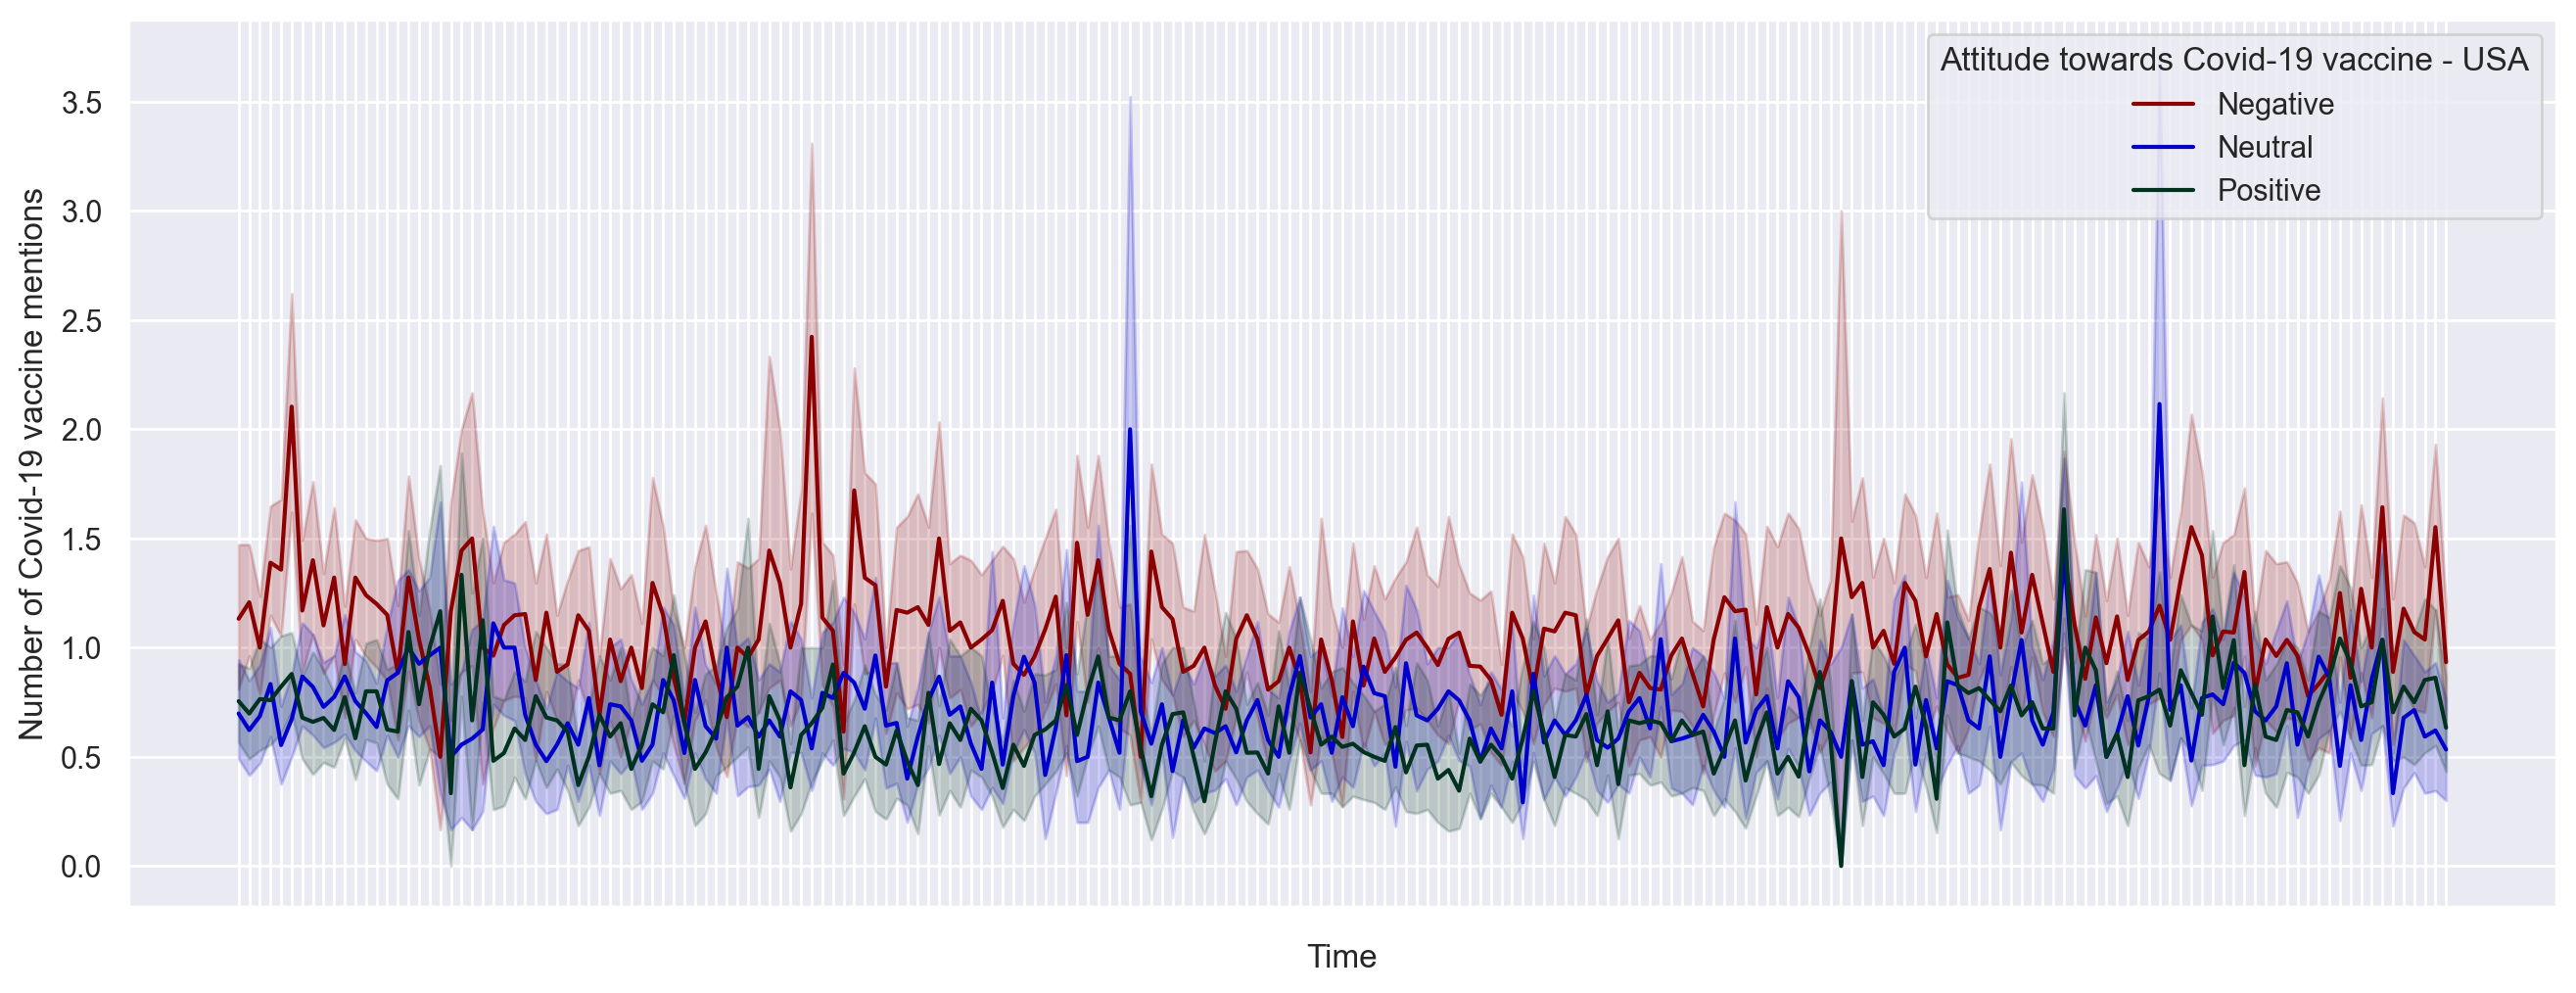

In [297]:
#Plot line chart 

mpl.rcParams['figure.dpi'] = 200
plt.figure(figsize = (16, 6))
sns.set(style = "darkgrid")

ax = sns.lineplot(x = "Time in UTC" ,y = "Number of Covid-19 vaccine mentions", hue = 'polarity', data = time_series_df_usa2,
                  palette = sns.color_palette(["#8b0000","#0000cd", "#013220"]))
ax.set(xlabel = 'Time', ylabel = "Number of Covid-19 vaccine mentions")
plt.legend(title = 'Attitude towards Covid-19 vaccine - USA', loc = 'upper right', labels = ['Negative', 'Neutral', 'Positive'])
sns.set(rc = {"lines.linewidth": 1})
ax.set(xticklabels = [])

plt.show()

In [298]:
#Create a pie chart to show the percentage of each emotion

df_pie_usa2 = df_usa2.groupby('polarity').size()

mylabels = ["Negative", "Neutral", "Positive"]
mycolors = ["darkred","mediumblue", "darkgreen"]
myvalues_usa2 = [df_pie_usa2[-1], df_pie_usa2[0], df_pie_usa2[1]]

%store myvalues_usa2

fig = go.Figure(data = [go.Pie(labels = mylabels, values = myvalues_usa2)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, 
                  marker = dict(colors = mycolors, line = dict(color = '#000000', width = 2)),
                  title = "Polarity Pie - USA2")

fig.show()

Stored 'myvalues_usa2' (list)


## Adding everything together side by side

In [299]:
#Create the subplots

myspecs = [[{"type": "scatter", "rowspan": 2}, {"type": "scatter", "rowspan": 2}],
           [None, None],
           [{"type": "scatter", "rowspan": 2}, {"type": "scatter", "rowspan": 2}],
           [None, None],
           [{"type": "pie",},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"}]]

fig = make_subplots(cols = 2, rows = 6, specs = myspecs)

In [300]:
%%capture

#Time series World

fig.add_trace(go.Scatter(x = time_series, y = time_series_df[f"Number of Covid-19 vaccine mentions"][time_series_df['polarity'] == 0].reset_index(drop = True),
                         name = "Neutral", opacity = 0.8), row = 1, col = 1)   

fig.add_trace(go.Scatter(x = time_series, y = time_series_df[f"Number of Covid-19 vaccine mentions"][time_series_df['polarity'] == -1].reset_index(drop = True),
                         name ="Negative", opacity = 0.8), row = 1, col = 1)

fig.add_trace(go.Scatter(x = time_series, y = time_series_df[f"Number of Covid-19 vaccine mentions"][time_series_df['polarity'] == 1].reset_index(drop = True),
                         name = "Positive", opacity = 0.8), row = 1, col = 1)

In [301]:
%%capture

#Time series World2

fig.add_trace(go.Scatter(x = time_series2, y = time_series_df2[f"Number of Covid-19 vaccine mentions"][time_series_df2['polarity'] == 0].reset_index(drop = True),
                         name = "Neutral", opacity = 0.8), row = 1, col = 2)   

fig.add_trace(go.Scatter(x = time_series2, y = time_series_df2[f"Number of Covid-19 vaccine mentions"][time_series_df2['polarity'] == -1].reset_index(drop = True),
                         name ="Negative", opacity = 0.8), row = 1, col = 2)

fig.add_trace(go.Scatter(x = time_series2, y = time_series_df2[f"Number of Covid-19 vaccine mentions"][time_series_df2['polarity'] == 1].reset_index(drop = True),
                         name = "Positive", opacity = 0.8), row = 1, col = 2)

In [302]:
%%capture

#Time series USA

fig.add_trace(go.Scatter(x = time_series_usa, y = time_series_df_usa[f"Number of Covid-19 vaccine mentions"][time_series_df_usa['polarity'] == 0].reset_index(drop = True),
                         name = "Neutral", opacity = 0.8), row = 3, col = 1)   

fig.add_trace(go.Scatter(x = time_series_usa, y = time_series_df_usa[f"Number of Covid-19 vaccine mentions"][time_series_df_usa['polarity'] == -1].reset_index(drop = True),
                         name ="Negative", opacity = 0.8), row = 3, col = 1)

fig.add_trace(go.Scatter(x = time_series_usa, y = time_series_df_usa[f"Number of Covid-19 vaccine mentions"][time_series_df_usa['polarity'] == 1].reset_index(drop = True),
                         name = "Positive", opacity = 0.8), row = 3, col = 1)

In [303]:
%%capture

#Time series USA2

fig.add_trace(go.Scatter(x = time_series_usa2, y = time_series_df_usa2[f"Number of Covid-19 vaccine mentions"][time_series_df_usa2['polarity'] == 0].reset_index(drop = True),
                         name = "Neutral", opacity = 0.8), row = 3, col = 2)   

fig.add_trace(go.Scatter(x = time_series_usa2, y = time_series_df_usa2[f"Number of Covid-19 vaccine mentions"][time_series_df_usa2['polarity'] == -1].reset_index(drop = True),
                         name ="Negative", opacity = 0.8), row = 3, col = 2)

fig.add_trace(go.Scatter(x = time_series_usa2, y = time_series_df_usa2[f"Number of Covid-19 vaccine mentions"][time_series_df_usa2['polarity'] == 1].reset_index(drop = True),
                         name = "Positive", opacity = 0.8), row = 3, col = 2)

In [304]:
%%capture

#Pie World

fig.add_trace(go.Pie(labels = mylabels, values = myvalues, hovertemplate = "%{label}: <br>Value: %{value}",
                     marker = dict(colors = mycolors, line = dict(color = '#000000', width = 4)), opacity = 0.7,
                     showlegend = True, textposition = 'inside', rotation = 90), row = 5, col = 1)   

In [305]:
%%capture

#Pie World2

fig.add_trace(go.Pie(labels = mylabels, values = myvalues2, hovertemplate = "%{label}: <br>Value: %{value}",
                     marker = dict(colors = mycolors, line = dict(color = '#000000', width = 4)), opacity = 0.7,
                     showlegend = True, textposition = 'inside', rotation = 90), row = 5, col = 2)   

In [306]:
%%capture

#Pie USA

fig.add_trace(go.Pie(labels = mylabels, values = myvalues_usa, hovertemplate = "%{label}: <br>Value: %{value}",
                     marker = dict(colors = mycolors, line = dict(color = '#000000', width = 4)), opacity = 0.7,
                     showlegend = True, textposition = 'inside', rotation = 90), row = 6, col = 1) 

In [307]:
%%capture

#Pie USA2

fig.add_trace(go.Pie(labels = mylabels, values = myvalues_usa2, hovertemplate = "%{label}: <br>Value: %{value}",
                     marker = dict(colors = mycolors, line = dict(color = '#000000', width = 4)), opacity = 0.7,
                     showlegend = True, textposition = 'inside', rotation = 90), row = 6, col = 2) 

In [308]:
mytitle = f"Real-time tracking Covid-19 vaccine mentions collected from {len(df2.index)} tweets from Twitter,<br>which {len(df_usa2.index)} of those were created at USA {'('}{round(percent_usa2, 2)}{'%)'}."


fig.update_layout(title_text = mytitle,  geo = dict(scope = 'usa'), template = "plotly_dark", 
                  margin = dict(r = 20, t = 50, b = 50, l = 20),
                  annotations = [go.layout.Annotation(text = "Source: Twitter", showarrow = False, 
                                                      xref = "paper", yref = "paper", x = 0, y = 0)], 
                  showlegend = False, xaxis_rangeslider_visible = False, height = 1600, width = 980)